In [10]:
# 필요한 라이브러리 설치 (미설치된 경우 주석 해제 후 실행)
# !pip install pandas matplotlib wordcloud

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.font_manager as fm


In [2]:
# CSV 파일 로드 (파일 경로는 본인 환경에 맞게 수정)
file_path = "qanda_reviews.csv"  
df = pd.read_csv(file_path)

# 데이터 확인 (앞부분 5개 행 출력)
df.head()


,userName,score,at,content
0,임호준,1,2025-02-23 00:00:28,7일 무료 혜택 있는거 맞아요???
1,:,1,2025-02-22 21:48:21,제발 이상한 광고 좀 안나오게 해주세요 공부하는 데 쓰이는 앱인데 자꾸 음란한 광고...
2,이영심,4,2025-02-22 18:45:56,괜찮긴 한데 답이 다 틀리네요;;ㅎ
3,백근영,1,2025-02-22 16:15:14,아니 광고가 나온다 치더라도 너무 길잖아요... 아니 5초 뒤에 나갈 수 있게라도 ...
4,이현민,1,2025-02-22 14:59:39,광고시간이 너무 많이 늘어나서 비효율적


In [10]:
# 감정 분석 수행
sentiments = []

for review in df["content"]:  # 처음 50개 리뷰만 분석
    review = str(review)
    if any(word in review for word in ["좋아요", "감사합니다", "최고", "굿", "도움", "쉽게", "이해", "조아용"]):
        sentiments.append("긍정")
    elif any(word in review for word in ["광고", "불편", "최악", "환불", "싫다", "돈", "틀리", "비효율", "속지마", "유료"]):
        sentiments.append("부정")
    else:
        sentiments.append("중립")

# 결과를 데이터프레임에 추가
df_sentiment = df.copy()
df_sentiment["감정 분석 결과"] = sentiments

# 감정 분석 결과 확인
df_sentiment[["content", "감정 분석 결과"]].head(10)


,content,감정 분석 결과
0,7일 무료 혜택 있는거 맞아요???,중립
1,제발 이상한 광고 좀 안나오게 해주세요 공부하는 데 쓰이는 앱인데 자꾸 음란한 광고...,부정
2,괜찮긴 한데 답이 다 틀리네요;;ㅎ,부정
3,아니 광고가 나온다 치더라도 너무 길잖아요... 아니 5초 뒤에 나갈 수 있게라도 ...,부정
4,광고시간이 너무 많이 늘어나서 비효율적,부정
5,광고개기네,부정
6,광고가 너무 많고 길어요,부정
7,아니 광고가지고 뭐라 안 할려 했는 데ㅋㅋ 배민 15초짜리 광고 계속 틀어주는 건 ...,부정
8,테블릿에서 사용할때 가로모드가 안돼서 불편해요,부정
9,광고 그만 보내라 마지막 경고다,부정


In [40]:
# pip install pandas textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   --------------------------------------- 624.3/624.3 kB 11.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [43]:
import pandas as pd
from textblob import TextBlob

# 🔹 1. CSV 파일 불러오기
file_path = "qanda_reviews.csv"  # Jupyter Notebook과 같은 디렉토리에 파일 위치
df = pd.read_csv(file_path, encoding="utf-8-sig")

# 🔹 2. 감성 분석 함수 (긍정/부정만 분류)
def get_sentiment(text):
    text = str(text)  # 문자열 변환
    positive_words = ["좋아요", "감사합니다", "최고", "굿", "도움", "쉽게", "이해", "조아용"]
    negative_words = ["광고", "불편", "최악", "환불", "싫다", "돈", "틀리", "비효율", "속지마", "유료"]

    if any(word in text for word in positive_words):
        return "긍정"
    elif any(word in text for word in negative_words):
        return "부정"
    else:
        polarity = TextBlob(text).sentiment.polarity
        return "긍정" if polarity >= 0 else "부정"

# 🔹 3. 감성 분석 적용
df["감정 분석 결과"] = df["content"].apply(get_sentiment)

# 🔹 4. 감성 비율 계산
sentiment_counts = df["감정 분석 결과"].value_counts(normalize=True) * 100
sentiment_df = sentiment_counts.reset_index()
sentiment_df.columns = ["감성", "비율(%)"]

# 🔹 5. 결과 출력
print(sentiment_df)

# 🔹 6. 감성 분석 결과를 CSV로 저장
sentiment_df.to_csv("qanda_sentiment_results.csv", index=False, encoding="utf-8-sig")


   감성  비율(%)
0  긍정   65.4
1  부정   34.6


In [11]:
# 주요 키워드 추출
keywords = []

for review in df["content"]:
    review = str(review)
    words = review.split()  # 공백 기준 단어 분리
    extracted_keywords = []

    # 특정 키워드 포함 여부 확인
    for word in words:
        if any(kw in word for kw in ["광고", "프리미엄", "결제", "환불", "무료", "유료", "문제", "풀이", "AI", "공부"]):
            extracted_keywords.append(word)

    # 중복 제거 후 리스트 추가
    keywords.append(", ".join(set(extracted_keywords)))

# 결과를 데이터프레임에 추가
df_sentiment["주요 키워드"] = keywords

# 키워드 분석 결과 확인
df_sentiment[["content", "주요 키워드"]].head(10)


,content,주요 키워드
0,7일 무료 혜택 있는거 맞아요???,무료
1,제발 이상한 광고 좀 안나오게 해주세요 공부하는 데 쓰이는 앱인데 자꾸 음란한 광고...,"오타쿠애니광고만, 공부하는, 광고가, 이런광고, 광고"
2,괜찮긴 한데 답이 다 틀리네요;;ㅎ,
3,아니 광고가 나온다 치더라도 너무 길잖아요... 아니 5초 뒤에 나갈 수 있게라도 ...,"광고가, 광고를"
4,광고시간이 너무 많이 늘어나서 비효율적,광고시간이
5,광고개기네,광고개기네
6,광고가 너무 많고 길어요,광고가
7,아니 광고가지고 뭐라 안 할려 했는 데ㅋㅋ 배민 15초짜리 광고 계속 틀어주는 건 ...,"광고가지고, 광고"
8,테블릿에서 사용할때 가로모드가 안돼서 불편해요,
9,광고 그만 보내라 마지막 경고다,광고


In [13]:
df_sentiment

,userName,score,at,content,감정 분석 결과,주요 키워드
0,임호준,1,2025-02-23 00:00:28,7일 무료 혜택 있는거 맞아요???,중립,무료
1,:,1,2025-02-22 21:48:21,제발 이상한 광고 좀 안나오게 해주세요 공부하는 데 쓰이는 앱인데 자꾸 음란한 광고...,부정,"오타쿠애니광고만, 공부하는, 광고가, 이런광고, 광고"
2,이영심,4,2025-02-22 18:45:56,괜찮긴 한데 답이 다 틀리네요;;ㅎ,부정,
3,백근영,1,2025-02-22 16:15:14,아니 광고가 나온다 치더라도 너무 길잖아요... 아니 5초 뒤에 나갈 수 있게라도 ...,부정,"광고가, 광고를"
4,이현민,1,2025-02-22 14:59:39,광고시간이 너무 많이 늘어나서 비효율적,부정,광고시간이
...,...,...,...,...,...,...
995,별거아냐,5,2023-10-29 12:08:11,폼 미쳤다리,중립,
996,곽승언,1,2023-10-25 22:55:36,공부하라고 만들어놓고 겜 광고가 나온데,부정,"공부하라고, 광고가"
997,감도호,5,2023-10-25 21:25:04,해설과 풀이과정이 잘 적혀있어서 좋았어요^^,중립,풀이과정이
998,박유천,2,2023-10-25 16:11:22,앱에서 계속 일시적인 오류가 발생한다는데 왜 이런거죠..?,중립,


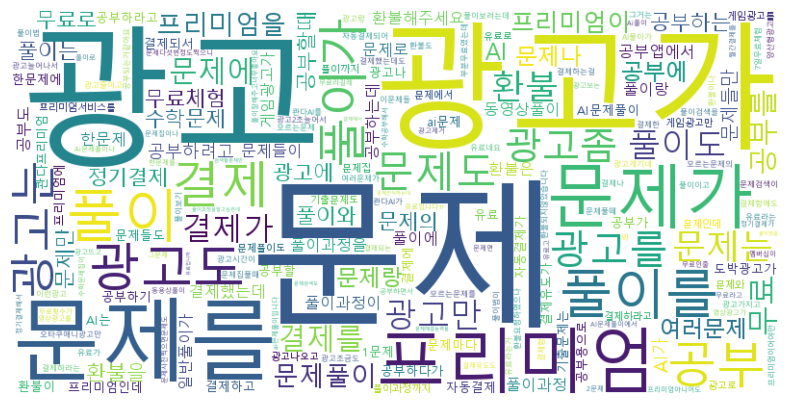

In [12]:
# 키워드 텍스트 변환
keyword_text = " ".join([kw for kw in keywords if kw])

# 업로드한 한글 폰트 경로 (파일명은 본인이 업로드한 폰트에 맞게 변경)
font_path = "C:/Windows/Fonts/malgun.ttf"

# 워드 클라우드 생성
wordcloud = WordCloud(
    font_path=font_path,  # 한글 폰트 적용
    background_color="white",
    width=800,
    height=400
).generate(keyword_text)

# 워드 클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


### 콴다 선생님용 리뷰 

In [2]:
from google_play_scraper import reviews, Sort
import pandas as pd

result, _ = reviews(
    'com.mathpresso.qandateacher',  # 콴다 앱의 패키지명
    lang='ko',  # 한국어 리뷰 가져오기
    country='kr',  # 한국 스토어 기준
    sort=Sort.NEWEST,  # 최신순 정렬
    count=100  # 가져올 리뷰 수
)

print(result[:5])  # 처음 5개 리뷰 출력


[{'reviewId': 'a0a168e6-f673-4fb3-b88d-566b160fa276', 'userName': '친구배', 'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjXoQuNthZfGXXHsEkTg2zXlJoO0moF7EyzCbpm0pFFihobg9UnH', 'content': '돈이 충분해도 기프티콘을 구매할 수 없습니다', 'score': 2, 'thumbsUpCount': 0, 'reviewCreatedVersion': '3.0.11', 'at': datetime.datetime(2025, 2, 20, 4, 20, 14), 'replyContent': '안녕하세요 콴다 운영팀입니다.\n먼저 소중한 시간을 내어 리뷰를 남겨 주셔서 감사합니다. 안타깝게도 리뷰에서는 유료 코인/결제/환불/계정 등의 문의를 해결해 드리기 어렵습니다😓 남겨주신 내용에 대해 자세한 확인 및 진행을 위하여 번거로우시겠지만 앱 내 1:1 문의하기를 통해 문의를 남겨 주시면 빠르게 확인 후 답변 드리겠습니다. 저희 콴다 서비스를 찾아 주셔서 감사합니다🧡', 'repliedAt': datetime.datetime(2025, 2, 20, 15, 21, 37), 'appVersion': '3.0.11'}, {'reviewId': '21f7ffe9-3bb5-4395-824f-23e0df4b5cee', 'userName': '율무래기', 'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjXSWiVAQDVzvGuB4TkfoGvM-g42s62JJXsMS1s744hDsLhN6VY', 'content': '왜 대학을 눌렀더니 단과대가 안 뜨나요? 사용설명이라도 미리 써주셨으면 합니다', 'score': 1, 'thumbsUpCount': 0, 'reviewCreatedVersion': '3.0.11', 'at': datetime.datetime(2025, 2, 13, 1

In [16]:
def fetch_playstore_reviews(app_id, lang='ko', country='kr', num_reviews=1000):
    all_reviews = []
    count = 100  # 한 번에 가져올 리뷰 수
    for _ in range((num_reviews // count) + 1):
        result, _ = reviews(
            app_id,
            lang=lang,
            country=country,
            sort=Sort.NEWEST,
            count=count
        )
        all_reviews.extend(result)
        if len(result) < count:
            break
    return pd.DataFrame(all_reviews[:num_reviews])

# 콴다 선생님 앱 리뷰 
teacher_reviews = fetch_playstore_reviews('com.mathpresso.qandateacher')
teacher_reviews

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,a0a168e6-f673-4fb3-b88d-566b160fa276,친구배,https://play-lh.googleusercontent.com/a-/ALV-U...,돈이 충분해도 기프티콘을 구매할 수 없습니다,2,0,3.0.11,2025-02-20 04:20:14,안녕하세요 콴다 운영팀입니다.\n먼저 소중한 시간을 내어 리뷰를 남겨 주셔서 감사합...,2025-02-20 15:21:37,3.0.11
1,21f7ffe9-3bb5-4395-824f-23e0df4b5cee,율무래기,https://play-lh.googleusercontent.com/a-/ALV-U...,왜 대학을 눌렀더니 단과대가 안 뜨나요? 사용설명이라도 미리 써주셨으면 합니다,1,0,3.0.11,2025-02-13 01:14:24,안녕하세요 콴다 팀 입니다.\n학교/학과 정보를 입력하신 정보와 대조하여 승인 절차...,2025-02-13 10:12:23,3.0.11
2,47a39bd3-e020-4405-86cc-8c6abcfbe759,귀요미,https://play-lh.googleusercontent.com/a-/ALV-U...,경북대 자율전공학부도 넣어주시면 감사하겠습니다... 학부가 없어서 가입이 불가능해요,4,0,3.0.11,2025-02-12 03:13:54,안녕하세요 콴다 팀 입니다.\n학교/학과 정보를 입력하신 정보와 대조하여 승인 절차...,2025-02-12 13:25:43,3.0.11
3,d260f3c7-038e-4814-8b6a-a51f0c50cbb4,시러,https://play-lh.googleusercontent.com/a-/ALV-U...,회원가입하려고 대학교 선택했는데 단과대가 다 있는게 아니라서 회원가입을 못하네요. ...,3,0,3.0.11,2025-02-01 22:52:33,안녕하세요 콴다 팀 입니다.\n학교/학과 정보를 입력하신 정보와 대조하여 승인 절차...,2025-02-02 10:50:47,3.0.11
4,34a93942-7364-4141-a20c-ba2ca74a085c,안성욱,https://play-lh.googleusercontent.com/a-/ALV-U...,관리자들 일을 쳐 안하네요 가입승인 안한지 이틀째인데 그럼 1일내 된다고 말을 쳐 ...,1,0,3.0.11,2025-02-01 14:46:27,안녕하세요. 콴다 팀입니다.\n소중한 리뷰 감사드립니다. 먼저 선생님 인증 신청의 ...,2025-02-02 10:49:20,3.0.11
...,...,...,...,...,...,...,...,...,...,...,...
995,326347ba-04c3-48ba-a113-be429af6bdfc,이민수,https://play-lh.googleusercontent.com/a/ACg8oc...,문제풀이를 해주고 싶어도 문제풀이 버튼 입력 후 풀이시간입력 혹은 답변을 보내주려고...,1,52,2.1.17,2022-04-10 09:05:20,None,NaT,2.1.17
996,b437088c-739c-453d-94a4-81038c8ad8ae,김지원,https://play-lh.googleusercontent.com/a-/ALV-U...,똑같은 문제를 여러 번 보는 것에도 예치금이 여러 번 나가는 건 좀 ㅠ,1,1,2.1.16,2022-04-07 16:26:34,None,NaT,2.1.16
997,956e9f70-683e-4548-8b85-b4925e72a5d8,아 왜나 바쁜데,https://play-lh.googleusercontent.com/a-/ALV-U...,진심 네트워크 오류가 너무 심해요 한문제 풀때 정작 푸는 시간이 2분이면 네트워크 ...,1,0,None,2022-04-07 11:16:15,None,NaT,None
998,e04d8037-3a25-48e1-80b3-d1f7f90ea51a,조하연,https://play-lh.googleusercontent.com/a/ACg8oc...,진짜 센터에 공부하는데 여러운게 있어서 깔았는데 하는법도 알려주고 해서 너무 좋아요...,5,1,2.1.16,2022-03-30 17:32:51,None,NaT,2.1.16


In [17]:
df = pd.DataFrame(teacher_reviews)
df.to_csv('google_teacher_reviews.csv', index=False, encoding='utf-8-sig')

In [18]:
# CSV 파일 로드 (파일 경로는 본인 환경에 맞게 수정)
file_path = "google_teacher_reviews.csv"  
df = pd.read_csv(file_path)

# 데이터 확인 (앞부분 5개 행 출력)
df.head()


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,a0a168e6-f673-4fb3-b88d-566b160fa276,친구배,https://play-lh.googleusercontent.com/a-/ALV-U...,돈이 충분해도 기프티콘을 구매할 수 없습니다,2,0,3.0.11,2025-02-20 04:20:14,안녕하세요 콴다 운영팀입니다.\n먼저 소중한 시간을 내어 리뷰를 남겨 주셔서 감사합...,2025-02-20 15:21:37,3.0.11
1,21f7ffe9-3bb5-4395-824f-23e0df4b5cee,율무래기,https://play-lh.googleusercontent.com/a-/ALV-U...,왜 대학을 눌렀더니 단과대가 안 뜨나요? 사용설명이라도 미리 써주셨으면 합니다,1,0,3.0.11,2025-02-13 01:14:24,안녕하세요 콴다 팀 입니다.\n학교/학과 정보를 입력하신 정보와 대조하여 승인 절차...,2025-02-13 10:12:23,3.0.11
2,47a39bd3-e020-4405-86cc-8c6abcfbe759,귀요미,https://play-lh.googleusercontent.com/a-/ALV-U...,경북대 자율전공학부도 넣어주시면 감사하겠습니다... 학부가 없어서 가입이 불가능해요,4,0,3.0.11,2025-02-12 03:13:54,안녕하세요 콴다 팀 입니다.\n학교/학과 정보를 입력하신 정보와 대조하여 승인 절차...,2025-02-12 13:25:43,3.0.11
3,d260f3c7-038e-4814-8b6a-a51f0c50cbb4,시러,https://play-lh.googleusercontent.com/a-/ALV-U...,회원가입하려고 대학교 선택했는데 단과대가 다 있는게 아니라서 회원가입을 못하네요. ...,3,0,3.0.11,2025-02-01 22:52:33,안녕하세요 콴다 팀 입니다.\n학교/학과 정보를 입력하신 정보와 대조하여 승인 절차...,2025-02-02 10:50:47,3.0.11
4,34a93942-7364-4141-a20c-ba2ca74a085c,안성욱,https://play-lh.googleusercontent.com/a-/ALV-U...,관리자들 일을 쳐 안하네요 가입승인 안한지 이틀째인데 그럼 1일내 된다고 말을 쳐 ...,1,0,3.0.11,2025-02-01 14:46:27,안녕하세요. 콴다 팀입니다.\n소중한 리뷰 감사드립니다. 먼저 선생님 인증 신청의 ...,2025-02-02 10:49:20,3.0.11


In [26]:
# 감정 분석 수행
sentiments = []

for review in df["content"][:1000]:  
    review = str(review)
    if any(word in review for word in ["좋아요", "재밌습니다", "만족", "최고", "굿", "도움", "쉽게", "이해"]):
        sentiments.append("긍정")
    elif any(word in review for word in ["광고", "불편", "최악", "환불", "싫다", "돈", "틀리", "비효율", "속지마", "유료", "부당", "테러", "문제"]):
        sentiments.append("부정")
    else:
        sentiments.append("중립")

# 결과를 데이터프레임에 추가
df_sentiment = df.copy()
df_sentiment["감정 분석 결과"] = sentiments

# 감정 분석 결과 확인
df_sentiment[["content", "감정 분석 결과"]].head(10)


,content,감정 분석 결과
0,돈이 충분해도 기프티콘을 구매할 수 없습니다,부정
1,왜 대학을 눌렀더니 단과대가 안 뜨나요? 사용설명이라도 미리 써주셨으면 합니다,중립
2,경북대 자율전공학부도 넣어주시면 감사하겠습니다... 학부가 없어서 가입이 불가능해요,중립
3,회원가입하려고 대학교 선택했는데 단과대가 다 있는게 아니라서 회원가입을 못하네요. ...,중립
4,관리자들 일을 쳐 안하네요 가입승인 안한지 이틀째인데 그럼 1일내 된다고 말을 쳐 ...,중립
5,요즘 질문량이 많이 적네요. 코인 소멸 기한을 늘리는게 낫지 않을까 생각합니다,중립
6,안녕하세요... 혹시 선생님 인증은 언제쯤 되나요... ㅠㅠ 2~3일 지난 것 같은...,중립
7,문제점 1 : 지나치게 어려운 문제들만 학생들이 올리는 경우가 많습니다. 문제점 2...,부정
8,개념을 아예 모르는 학생이 3천 몇 코인에 유전 문제 여러개 올려놓고 개념이랑 풀이...,부정
9,맞는 풀이인 것 같은데 오답 신고를 하는 경우가 많아 의욕이 떨어지는 것 같습니다....,긍정


In [44]:
import pandas as pd
from textblob import TextBlob

# 🔹 1. CSV 파일 불러오기
file_path = "google_teacher_reviews.csv"  # Jupyter Notebook과 같은 디렉토리에 파일 위치
df = pd.read_csv(file_path, encoding="utf-8-sig")

# 🔹 2. 감성 분석 함수 (긍정/부정만 분류)
def get_sentiment(text):
    text = str(text)  # 문자열 변환
    positive_words = ["좋아요", "감사합니다", "최고", "굿", "도움", "쉽게", "이해", "조아용"]
    negative_words = ["광고", "불편", "최악", "환불", "싫다", "돈", "틀리", "비효율", "속지마", "유료"]

    if any(word in text for word in positive_words):
        return "긍정"
    elif any(word in text for word in negative_words):
        return "부정"
    else:
        polarity = TextBlob(text).sentiment.polarity
        return "긍정" if polarity >= 0 else "부정"

# 🔹 3. 감성 분석 적용
df["감정 분석 결과"] = df["content"].apply(get_sentiment)

# 🔹 4. 감성 비율 계산
sentiment_counts = df["감정 분석 결과"].value_counts(normalize=True) * 100
sentiment_df = sentiment_counts.reset_index()
sentiment_df.columns = ["감성", "비율(%)"]

# 🔹 5. 결과 출력
print(sentiment_df)

# 🔹 6. 감성 분석 결과를 CSV로 저장
sentiment_df.to_csv("google_teacher_results.csv", index=False, encoding="utf-8-sig")


   감성  비율(%)
0  긍정   94.0
1  부정    6.0


In [25]:
from konlpy.tag import Okt
from collections import Counter
import pandas as pd
import re

# CSV 파일 불러오기
df = pd.read_csv('google_teacher_reviews.csv')

# 결측치 제거
df = df.dropna(subset=['content'])

# 텍스트 전처리 함수
def clean_text(text):
    text = re.sub(r'\W+', ' ', text)
    return text.strip()

# 전처리된 텍스트 열 추가
df['cleaned_content'] = df['content'].apply(clean_text)

# 형태소 분석기
okt = Okt()

# 명사 추출
df['nouns'] = df['cleaned_content'].apply(lambda x: okt.nouns(x))

# 모든 명사 리스트
all_nouns = [noun for nouns in df['nouns'] for noun in nouns]

# 단어 빈도수 계산
word_counts = Counter(all_nouns)

# 불용어 제거
stopwords = ['이', '그', '저', '것', '때', '내', '수', '등', '있다', '하다', '좋다', '같다', '되다']
filtered_words = {word: count for word, count in word_counts.items() if word not in stopwords and len(word) > 1}

# 상위 20개 키워드
top_words = sorted(filtered_words.items(), key=lambda x: x[1], reverse=True)[:20]

# 데이터프레임 생성
keywords_df = pd.DataFrame(top_words, columns=['단어', '빈도'])

# 결과 출력
print(keywords_df)


     단어   빈도
0    학생  350
1    문제  310
2   선생님  260
3    대학  240
4    코인  210
5    답변  180
6    학교  150
7    신고  130
8   대학교  120
9    선택  120
10   시간  110
11   사용  100
12   학과  100
13   가입   90
14   어플   90
15   생각   80
16   풀이   80
17   하나   80
18   이유   80
19   질문   80


In [27]:
# 주요 키워드 추출
keywords = []

for review in df["content"][:1000]: 
    review = str(review)
    words = review.split()  # 공백 기준 단어 분리
    extracted_keywords = []

    # 특정 키워드 포함 여부 확인
    for word in words:
        if any(kw in word for kw in ["문제","별점","대학","가입","환불","코인","승인","광고","수업","과목"]):
            extracted_keywords.append(word)

    # 중복 제거 후 리스트 추가
    keywords.append(", ".join(set(extracted_keywords)))

# 결과를 데이터프레임에 추가
df_sentiment["주요 키워드"] = keywords

# 키워드 분석 결과 확인
df_sentiment[["content", "주요 키워드"]]


,content,주요 키워드
0,돈이 충분해도 기프티콘을 구매할 수 없습니다,
1,왜 대학을 눌렀더니 단과대가 안 뜨나요? 사용설명이라도 미리 써주셨으면 합니다,대학을
2,경북대 자율전공학부도 넣어주시면 감사하겠습니다... 학부가 없어서 가입이 불가능해요,가입이
3,회원가입하려고 대학교 선택했는데 단과대가 다 있는게 아니라서 회원가입을 못하네요. ...,"회원가입하려고, 회원가입을, 대학교"
4,관리자들 일을 쳐 안하네요 가입승인 안한지 이틀째인데 그럼 1일내 된다고 말을 쳐 ...,가입승인
...,...,...
995,문제풀이를 해주고 싶어도 문제풀이 버튼 입력 후 풀이시간입력 혹은 답변을 보내주려고...,"코인소비만, 문제풀이, 문제풀이를"
996,똑같은 문제를 여러 번 보는 것에도 예치금이 여러 번 나가는 건 좀 ㅠ,문제를
997,진심 네트워크 오류가 너무 심해요 한문제 풀때 정작 푸는 시간이 2분이면 네트워크 ...,한문제
998,진짜 센터에 공부하는데 여러운게 있어서 깔았는데 하는법도 알려주고 해서 너무 좋아요...,


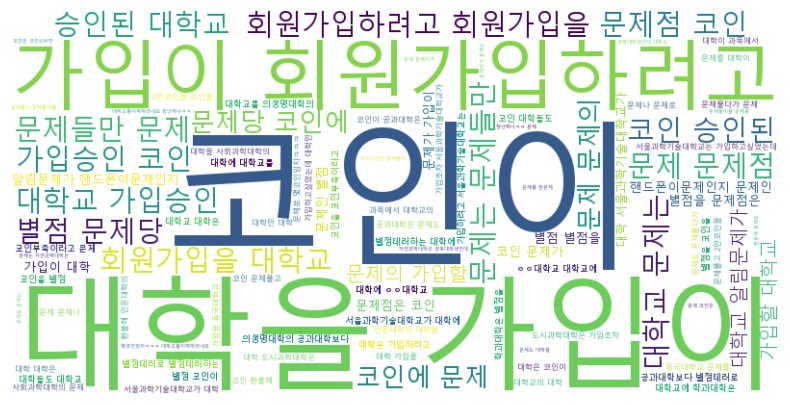

In [28]:
# 키워드 텍스트 변환
keyword_text = " ".join([kw for kw in keywords if kw])

# 업로드한 한글 폰트 경로 (파일명은 본인이 업로드한 폰트에 맞게 변경)
font_path = "C:/Windows/Fonts/malgun.ttf"

# 워드 클라우드 생성
wordcloud = WordCloud(
    font_path=font_path,  # 한글 폰트 적용
    background_color="white",
    width=800,
    height=400
).generate(keyword_text)

# 워드 클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


### 콴다과외 앱 리뷰 -> 구글 리뷰 18개 뿐

In [29]:
from google_play_scraper import reviews, Sort
import pandas as pd

result, _ = reviews(
    'com.mathpresso.tutor',  # 콴다 앱의 패키지명
    lang='ko',  # 한국어 리뷰 가져오기
    country='kr',  # 한국 스토어 기준
    sort=Sort.NEWEST,  # 최신순 정렬
    count=100  # 가져올 리뷰 수
)

print(result[:5])  # 처음 5개 리뷰 출력


[{'reviewId': 'a862bc4e-3727-432c-b482-52e4965a7e49', 'userName': 'Flower', 'userImage': 'https://play-lh.googleusercontent.com/a/ACg8ocIWPrbwK00-mOEPFvhqighsEsxGN0Mpc15Xg6ZibFA3w2iIxg=mo', 'content': '상담센터가 최악임 제대로 된 상황 설명이 없이 무조건 고객탓함', 'score': 1, 'thumbsUpCount': 1, 'reviewCreatedVersion': '0.9.81', 'at': datetime.datetime(2025, 2, 19, 13, 47, 45), 'replyContent': None, 'repliedAt': None, 'appVersion': '0.9.81'}, {'reviewId': 'bd15f849-cb52-4460-b954-e535e5bf8e26', 'userName': '박서연', 'userImage': 'https://play-lh.googleusercontent.com/a/ACg8ocIjFawSw6smKJ3LEgWfsfadxWQPlmEu_vVrNobW7jGYKRUtsQ=mo', 'content': '네트워크 오류나서 복구했더니 필기가 날라감. 내 필기 돌려줘요. 다른건 좋음.', 'score': 4, 'thumbsUpCount': 0, 'reviewCreatedVersion': '0.9.80', 'at': datetime.datetime(2025, 2, 13, 11, 45, 10), 'replyContent': None, 'repliedAt': None, 'appVersion': '0.9.80'}, {'reviewId': '77ff6678-2d55-49cc-9eef-0f2b86e0a6e5', 'userName': '얍얍', 'userImage': 'https://play-lh.googleusercontent.com/a/ACg8ocKSRsOfQcw8XKJ6SEU1ibTr

In [30]:
def fetch_playstore_reviews(app_id, lang='ko', country='kr', num_reviews=1000):
    all_reviews = []
    count = 100  # 한 번에 가져올 리뷰 수
    for _ in range((num_reviews // count) + 1):
        result, _ = reviews(
            app_id,
            lang=lang,
            country=country,
            sort=Sort.NEWEST,
            count=count
        )
        all_reviews.extend(result)
        if len(result) < count:
            break
    return pd.DataFrame(all_reviews[:num_reviews])

# 콴다 선생님 앱 리뷰 
tutor_reviews = fetch_playstore_reviews('com.mathpresso.tutor')
tutor_reviews

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,a862bc4e-3727-432c-b482-52e4965a7e49,Flower,https://play-lh.googleusercontent.com/a/ACg8oc...,상담센터가 최악임 제대로 된 상황 설명이 없이 무조건 고객탓함,1,1,0.9.81,2025-02-19 13:47:45,None,NaT,0.9.81
1,bd15f849-cb52-4460-b954-e535e5bf8e26,박서연,https://play-lh.googleusercontent.com/a/ACg8oc...,네트워크 오류나서 복구했더니 필기가 날라감. 내 필기 돌려줘요. 다른건 좋음.,4,0,0.9.80,2025-02-13 11:45:10,None,NaT,0.9.80
2,77ff6678-2d55-49cc-9eef-0f2b86e0a6e5,얍얍,https://play-lh.googleusercontent.com/a/ACg8oc...,S펜 버튼으로 지우개로 전환하는 기능 제발,3,0,None,2024-10-16 22:36:26,None,NaT,None
3,76d7215c-09cd-46c7-8cb8-813820a0955c,[],https://play-lh.googleusercontent.com/a/ACg8oc...,"앱오류가 너무 많아요 소리가 안들리는것,화면 끊김 등등,, 비대면으로 과외하는거면 ...",1,8,0.9.77,2024-07-27 20:06:30,None,NaT,0.9.77
4,2cbbef7a-8267-4164-8302-8fa8ffca5a06,쭈쭈바,https://play-lh.googleusercontent.com/a-/ALV-U...,두명이상 자녀시 불편함,1,0,None,2024-07-04 15:58:50,None,NaT,None
5,505ac0fc-d0cf-4a49-a165-57206f0d1fca,Serena,https://play-lh.googleusercontent.com/a-/ALV-U...,고객센터든 상담센터든 응대가 아주 최악입니다. 상식적이지 않음,1,11,0.9.69,2024-03-27 18:43:52,None,NaT,0.9.69
6,8df88921-d698-4b83-8d77-eeb6fc46a9b5,안채연,https://play-lh.googleusercontent.com/a/ACg8oc...,왜 이젠 수업할 때 블루투스 기기가 연결이 안 되나요? 전처럼 에어팟 끼고 수업하고...,4,7,0.9.62,2024-02-06 19:53:50,None,NaT,0.9.62
7,4303aa26-0c9f-45da-a7ce-80958fa5eb7a,송지원,https://play-lh.googleusercontent.com/a-/ALV-U...,제가 처음에 학생으로 가입했었는데 이제 선생님으로 전환하고싶은데 학생에서 선생님으로...,5,7,0.9.68,2024-01-30 17:40:22,None,NaT,0.9.68
8,e261c899-bfda-4424-8393-ed41701a78fd,황정선,https://play-lh.googleusercontent.com/a-/ALV-U...,황지원 소파아공주님,5,0,0.9.61,2023-12-07 20:13:26,None,NaT,0.9.61
9,9ea8d3b4-5030-47e0-b97c-ceec988c6ddd,김민서,https://play-lh.googleusercontent.com/a/ACg8oc...,아이패드나 삼성테블릿 펜 자체의 지우개 기능을 쓸 수 있으면 좋겠어요. 매번 지우개...,5,19,0.9.53,2023-09-18 12:20:52,None,NaT,0.9.53


In [31]:
df = pd.DataFrame(tutor_reviews)
df.to_csv('google_tutor_reviews.csv', index=False, encoding='utf-8-sig')

In [32]:
# CSV 파일 로드 (파일 경로는 본인 환경에 맞게 수정)
file_path = "google_tutor_reviews.csv"  
df = pd.read_csv(file_path)

# 데이터 확인 (앞부분 5개 행 출력)
df.head()


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,a862bc4e-3727-432c-b482-52e4965a7e49,Flower,https://play-lh.googleusercontent.com/a/ACg8oc...,상담센터가 최악임 제대로 된 상황 설명이 없이 무조건 고객탓함,1,1,0.9.81,2025-02-19 13:47:45,NaN,NaN,0.9.81
1,bd15f849-cb52-4460-b954-e535e5bf8e26,박서연,https://play-lh.googleusercontent.com/a/ACg8oc...,네트워크 오류나서 복구했더니 필기가 날라감. 내 필기 돌려줘요. 다른건 좋음.,4,0,0.9.80,2025-02-13 11:45:10,NaN,NaN,0.9.80
2,77ff6678-2d55-49cc-9eef-0f2b86e0a6e5,얍얍,https://play-lh.googleusercontent.com/a/ACg8oc...,S펜 버튼으로 지우개로 전환하는 기능 제발,3,0,NaN,2024-10-16 22:36:26,NaN,NaN,NaN
3,76d7215c-09cd-46c7-8cb8-813820a0955c,[],https://play-lh.googleusercontent.com/a/ACg8oc...,"앱오류가 너무 많아요 소리가 안들리는것,화면 끊김 등등,, 비대면으로 과외하는거면 ...",1,8,0.9.77,2024-07-27 20:06:30,NaN,NaN,0.9.77
4,2cbbef7a-8267-4164-8302-8fa8ffca5a06,쭈쭈바,https://play-lh.googleusercontent.com/a-/ALV-U...,두명이상 자녀시 불편함,1,0,NaN,2024-07-04 15:58:50,NaN,NaN,NaN


In [33]:
# 감정 분석 수행
sentiments = []

for review in df["content"][:1000]:  
    review = str(review)
    if any(word in review for word in ["좋아요", "재밌습니다", "만족", "최고", "굿", "도움", "쉽게", "이해"]):
        sentiments.append("긍정")
    elif any(word in review for word in ["광고", "불편", "최악", "환불", "싫다", "돈", "틀리", "비효율", "속지마", "유료", "부당", "테러", "문제"]):
        sentiments.append("부정")
    else:
        sentiments.append("중립")

# 결과를 데이터프레임에 추가
df_sentiment = df.copy()
df_sentiment["감정 분석 결과"] = sentiments

# 감정 분석 결과 확인
df_sentiment[["content", "감정 분석 결과"]].head(10)


,content,감정 분석 결과
0,상담센터가 최악임 제대로 된 상황 설명이 없이 무조건 고객탓함,부정
1,네트워크 오류나서 복구했더니 필기가 날라감. 내 필기 돌려줘요. 다른건 좋음.,중립
2,S펜 버튼으로 지우개로 전환하는 기능 제발,중립
3,"앱오류가 너무 많아요 소리가 안들리는것,화면 끊김 등등,, 비대면으로 과외하는거면 ...",중립
4,두명이상 자녀시 불편함,부정
5,고객센터든 상담센터든 응대가 아주 최악입니다. 상식적이지 않음,부정
6,왜 이젠 수업할 때 블루투스 기기가 연결이 안 되나요? 전처럼 에어팟 끼고 수업하고...,중립
7,제가 처음에 학생으로 가입했었는데 이제 선생님으로 전환하고싶은데 학생에서 선생님으로...,중립
8,황지원 소파아공주님,중립
9,아이패드나 삼성테블릿 펜 자체의 지우개 기능을 쓸 수 있으면 좋겠어요. 매번 지우개...,중립


In [45]:
import pandas as pd
from textblob import TextBlob

# 🔹 1. CSV 파일 불러오기
file_path = "google_tutor_reviews.csv"  # Jupyter Notebook과 같은 디렉토리에 파일 위치
df = pd.read_csv(file_path, encoding="utf-8-sig")

# 🔹 2. 감성 분석 함수 (긍정/부정만 분류)
def get_sentiment(text):
    text = str(text)  # 문자열 변환
    positive_words = ["좋아요", "감사합니다", "최고", "굿", "도움", "쉽게", "이해", "조아용"]
    negative_words = ["광고", "불편", "최악", "환불", "싫다", "돈", "틀리", "비효율", "속지마", "유료"]

    if any(word in text for word in positive_words):
        return "긍정"
    elif any(word in text for word in negative_words):
        return "부정"
    else:
        polarity = TextBlob(text).sentiment.polarity
        return "긍정" if polarity >= 0 else "부정"

# 🔹 3. 감성 분석 적용
df["감정 분석 결과"] = df["content"].apply(get_sentiment)

# 🔹 4. 감성 비율 계산
sentiment_counts = df["감정 분석 결과"].value_counts(normalize=True) * 100
sentiment_df = sentiment_counts.reset_index()
sentiment_df.columns = ["감성", "비율(%)"]

# 🔹 5. 결과 출력
print(sentiment_df)

# 🔹 6. 감성 분석 결과를 CSV로 저장
sentiment_df.to_csv("google_tutor_results.csv", index=False, encoding="utf-8-sig")

   감성  비율(%)
0  긍정   80.0
1  부정   20.0


In [34]:
from konlpy.tag import Okt
from collections import Counter
import pandas as pd
import re

# CSV 파일 불러오기
df = pd.read_csv('google_tutor_reviews.csv')

# 결측치 제거
df = df.dropna(subset=['content'])

# 텍스트 전처리 함수
def clean_text(text):
    text = re.sub(r'\W+', ' ', text)
    return text.strip()

# 전처리된 텍스트 열 추가
df['cleaned_content'] = df['content'].apply(clean_text)

# 형태소 분석기
okt = Okt()

# 명사 추출
df['nouns'] = df['cleaned_content'].apply(lambda x: okt.nouns(x))

# 모든 명사 리스트
all_nouns = [noun for nouns in df['nouns'] for noun in nouns]

# 단어 빈도수 계산
word_counts = Counter(all_nouns)

# 불용어 제거
stopwords = ['이', '그', '저', '것', '때', '내', '수', '등', '있다', '하다', '좋다', '같다', '되다']
filtered_words = {word: count for word, count in word_counts.items() if word not in stopwords and len(word) > 1}

# 상위 20개 키워드
top_words = sorted(filtered_words.items(), key=lambda x: x[1], reverse=True)[:20]

# 데이터프레임 생성
keywords_df = pd.DataFrame(top_words, columns=['단어', '빈도'])

# 결과 출력
print(keywords_df)


     단어  빈도
0   선생님  12
1    수업   7
2    과외   6
3    필기   5
4    기능   5
5    오류   4
6    가입   4
7    센터   3
8   지우개   3
9    전환   3
10   화면   3
11   이상   3
12   학생   3
13   개월   3
14   회사   3
15  갑자기   3
16   터치   3
17   상담   2
18   최악   2
19   고객   2


In [37]:
# 주요 키워드 추출
keywords = []

for review in df["content"][:1000]: 
    review = str(review)
    words = review.split()  # 공백 기준 단어 분리
    extracted_keywords = []

    # 특정 키워드 포함 여부 확인
    for word in words:
        if any(kw in word for kw in ["광고", "프리미엄", "결제", "환불", "무료", "유료", "문제", "풀이", "AI", "공부"]):
            extracted_keywords.append(word)

    # 중복 제거 후 리스트 추가
    keywords.append(", ".join(set(extracted_keywords)))

# 결과를 데이터프레임에 추가
df_sentiment["주요 키워드"] = keywords

# 키워드 분석 결과 확인
df_sentiment[["content", "주요 키워드"]]


,content,주요 키워드
0,상담센터가 최악임 제대로 된 상황 설명이 없이 무조건 고객탓함,
1,네트워크 오류나서 복구했더니 필기가 날라감. 내 필기 돌려줘요. 다른건 좋음.,
2,S펜 버튼으로 지우개로 전환하는 기능 제발,
3,"앱오류가 너무 많아요 소리가 안들리는것,화면 끊김 등등,, 비대면으로 과외하는거면 ...",
4,두명이상 자녀시 불편함,
5,고객센터든 상담센터든 응대가 아주 최악입니다. 상식적이지 않음,
6,왜 이젠 수업할 때 블루투스 기기가 연결이 안 되나요? 전처럼 에어팟 끼고 수업하고...,
7,제가 처음에 학생으로 가입했었는데 이제 선생님으로 전환하고싶은데 학생에서 선생님으로...,
8,황지원 소파아공주님,
9,아이패드나 삼성테블릿 펜 자체의 지우개 기능을 쓸 수 있으면 좋겠어요. 매번 지우개...,


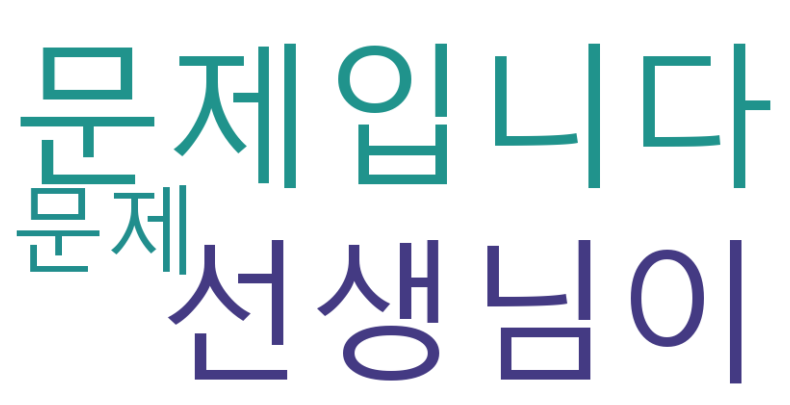

In [38]:
# 키워드 텍스트 변환
keyword_text = " ".join([kw for kw in keywords if kw])

# 업로드한 한글 폰트 경로 (파일명은 본인이 업로드한 폰트에 맞게 변경)
font_path = "C:/Windows/Fonts/malgun.ttf"

# 워드 클라우드 생성
wordcloud = WordCloud(
    font_path=font_path,  # 한글 폰트 적용
    background_color="white",
    width=800,
    height=400
).generate(keyword_text)

# 워드 클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
